# Exploratory Data Analysis

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab, rcParams
from scipy import stats

## Analysing the Dataframe

In [55]:
# Read preprocessed heart disease dataset and store into a dataframe variable
dfHeartDiseases = pd.read_excel("D:\Year3\ArtificialIntelligence\Assignment\HeartDiseasesDatasetPreprocessed.xlsx")
# Delete Unnamed column
del dfHeartDiseases['Unnamed: 0']
# Print dataframe
dfHeartDiseases

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,ECG,Max Heart Rate,Exercise Angina,ST Depression,Slope,Major Vessels Blocked,Thallium Test,Diagnosis
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
3,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
4,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,63,0,4,124,197,0,0,136,1,0.0,2,0,3,1
208,41,1,2,120,157,0,0,182,0,0.0,1,0,3,0
209,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
210,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [56]:
# Print shape of the dataframe
print("Shape: " + str(dfHeartDiseases.shape))

Shape: (212, 14)


In [57]:
# Print description of the dataframe
dfHeartDiseases.describe()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,ECG,Max Heart Rate,Exercise Angina,ST Depression,Slope,Major Vessels Blocked,Thallium Test,Diagnosis
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,53.306604,0.660377,3.316038,128.198113,243.924528,0.0,0.924528,150.745283,0.320755,0.914623,1.542453,0.471698,4.594340,0.429245
std,9.119291,0.474702,0.784402,14.958026,45.186543,0.0,0.994755,22.474445,0.467871,1.030770,0.586652,0.684390,1.926509,0.496140
min,29.000000,0.000000,2.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,45.750000,0.000000,3.000000,120.000000,210.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,241.500000,0.0,0.000000,155.000000,0.000000,0.600000,1.000000,0.000000,3.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,271.500000,0.0,2.000000,168.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,76.000000,1.000000,4.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,3.000000,2.000000,7.000000,1.000000


In [58]:
# Print information
dfHeartDiseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     212 non-null    int64  
 1   Sex                     212 non-null    int64  
 2   Chest Pain Type         212 non-null    int64  
 3   Resting Blood Pressure  212 non-null    int64  
 4   Cholesterol             212 non-null    int64  
 5   Fasting Blood Sugar     212 non-null    int64  
 6   ECG                     212 non-null    int64  
 7   Max Heart Rate          212 non-null    int64  
 8   Exercise Angina         212 non-null    int64  
 9   ST Depression           212 non-null    float64
 10  Slope                   212 non-null    int64  
 11  Major Vessels Blocked   212 non-null    int64  
 12  Thallium Test           212 non-null    int64  
 13  Diagnosis               212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.

## Analysing the Features

### Analysing the 'Diagnosis' Feature - Target Variable

In [59]:
oDiagnosisColumn = dfHeartDiseases["Diagnosis"]
dfHeartDiseases["Diagnosis"].unique()

array([1, 0], dtype=int64)

0    121
1     91
Name: Diagnosis, dtype: int64

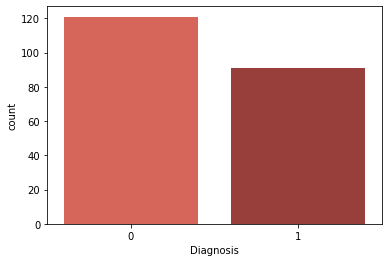

In [60]:
# Draw a graph using sns library
sns.countplot(x = 'Diagnosis', data = dfHeartDiseases, palette = "Reds_d")
# Print count of values in the Diagnosis column
oDiagnosisColumn.value_counts()

There are more people do not have heart disease.

### Analysing the 'Sex' Feature

In [61]:
dfHeartDiseases["Sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Sex', ylabel='Diagnosis'>

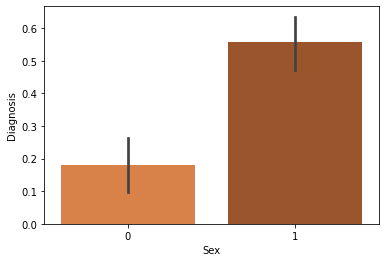

In [62]:
sns.barplot(x = dfHeartDiseases["Sex"], y = oDiagnosisColumn, palette = "Oranges_d")

More males have heart disease than females.

### Analysing the 'Chest Pain Type' Feature

In [63]:
dfHeartDiseases["Chest Pain Type"].unique()

array([4, 3, 2], dtype=int64)

<AxesSubplot:xlabel='Chest Pain Type', ylabel='Diagnosis'>

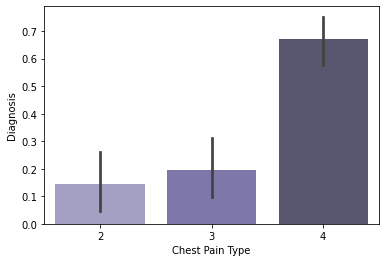

In [64]:
sns.barplot(x = dfHeartDiseases["Chest Pain Type"], y = oDiagnosisColumn, palette = "Purples_d")

A lot of people are asymptomatic, which means they do not have any chest pain.

### Analysing the 'Fasting Blood Sugar' Feature

In [65]:
dfHeartDiseases["Fasting Blood Sugar"].unique()

array([0], dtype=int64)

<AxesSubplot:xlabel='Fasting Blood Sugar', ylabel='Diagnosis'>

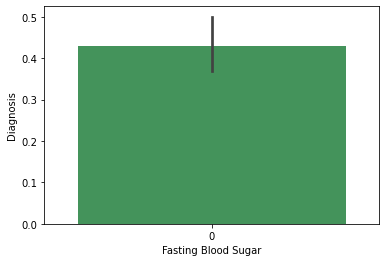

In [66]:
sns.barplot(x = dfHeartDiseases["Fasting Blood Sugar"], y = oDiagnosisColumn, palette = "Greens_d")

This indicates that this feature is the least feature as a lot of rows are deleted.

### Analysing the 'ECG' Feature

In [67]:
dfHeartDiseases["ECG"].unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='ECG', ylabel='Diagnosis'>

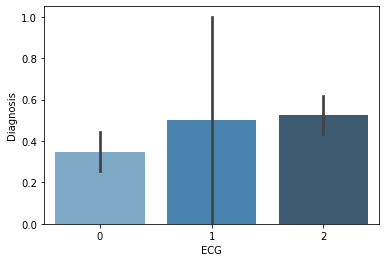

In [68]:
sns.barplot(x = dfHeartDiseases["ECG"], y = oDiagnosisColumn, palette = "Blues_d")

More people have an abnormality with the ECG results, indicating they have probable or definite left ventricular hypertrophy.

### Analysing the 'Exercise Angina' Feature

In [69]:
dfHeartDiseases["Exercise Angina"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Exercise Angina', ylabel='Diagnosis'>

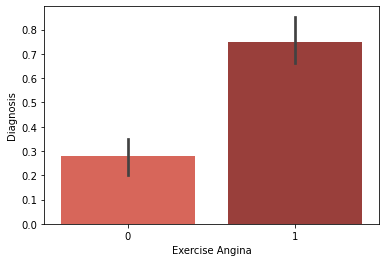

In [70]:
sns.barplot(x = dfHeartDiseases["Exercise Angina"], y = oDiagnosisColumn, palette = "Reds_d")

More people have experienced angina induced by exercise.

### Analysing the 'Slope' Feature

In [71]:
dfHeartDiseases["Slope"].unique()

array([2, 3, 1], dtype=int64)

<AxesSubplot:xlabel='Slope', ylabel='Diagnosis'>

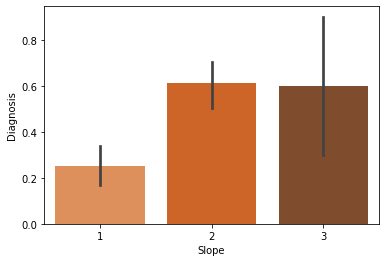

In [72]:
sns.barplot(x = dfHeartDiseases["Slope"], y = oDiagnosisColumn, palette = "Oranges_d")

A lot of people have flat or downloping slope in the ECG which indicates they have ischemia.

### Analysing the 'Major Vessels Blocked' Feature

In [73]:
dfHeartDiseases["Major Vessels Blocked"].unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='Major Vessels Blocked', ylabel='Diagnosis'>

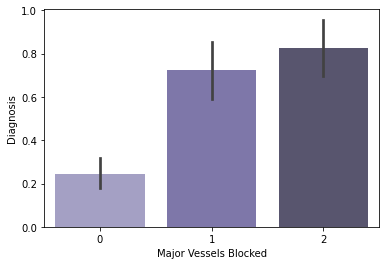

In [74]:
sns.barplot(x = dfHeartDiseases["Major Vessels Blocked"], y = oDiagnosisColumn, palette = "Purples_d")

More people have 2 major vessels blocked.

### Analysing the 'Thallium Test' Feature

In [75]:
dfHeartDiseases["Thallium Test"].unique()

array([7, 3, 6], dtype=int64)

<AxesSubplot:xlabel='Thallium Test', ylabel='Diagnosis'>

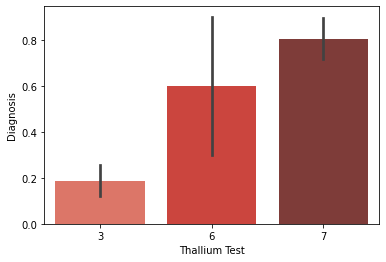

In [76]:
sns.barplot(x = dfHeartDiseases["Thallium Test"], y = oDiagnosisColumn, palette = "Reds_d")

Thalium test has produced results that suggests more people have a defect.